# Quick question on error bars using mc3.rednoise.binrms()
Gudmundur Stefansson @ Penn State;

email: gudmundur@psu.edu

In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['mathtext.fontset'] = 'stix'

# Read in photometry and plot light curve
This is out of transit data, and should be a flat line

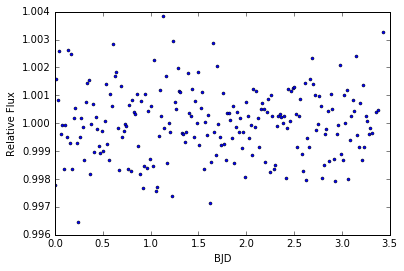

In [4]:
df = pd.read_csv("data.csv")
fig, ax = plt.subplots()
ax.plot(df.bjd,df.flux,lw=0,marker="o",markersize=3)
ax.set_xlabel("BJD")
ax.set_ylabel("Relative Flux")

# Now create a RMS vs bin plot using MC3


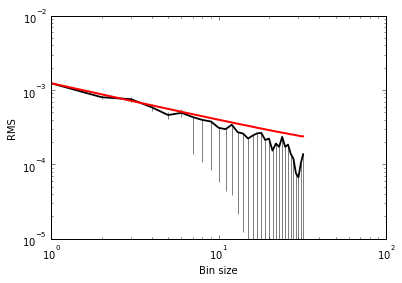

In [5]:
import sys
sys.path.append("/Users/gks/programs/MCcubed/")
sys.path.append("/Users/gks/programs/MCcubed/examples/models/")
import MCcubed as mc3

# Define residuals
res = np.array(df["flux"] - np.nanmedian(df["flux"]))

nbin = 32
rms, rmslo, rmshi, stderr, binsz = mc3.rednoise.binrms(res,nbin)

# Plot
fig, ax = plt.subplots()
ax.errorbar(binsz, rms, yerr=[rmslo, rmshi], fmt="k-",lw=1.8, ecolor='0.5', capsize=0, label="16 Cygni Data",elinewidth=1)
ax.plot(binsz, stderr, color='red', ls='-', lw=2, label="Gaussian std.")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Bin size")
ax.set_ylabel("RMS")

Reading Cubillos et al. 2017, then the distribution of the error bars should be asymmetric (described by an inverse gamma distribution). However, at the highest bin sizes the lower errorbars (rmslo) look to be too large, while the upper errorbars (rmshi) to small. Maybe they are inverted ? Any insight into what might be going wrong here ? 